## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

1 - Because we dont have any domain knowledge on our data, we want to analyze the data for our Bachelors project.
2 - Reduce the complexity of data while retaining essential information, facilitating easier interpretation and faster processing.
3 - Unsupervised
4 - Model Accuracy

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

In [2]:
!pip install pprint
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
data = pd.read_excel('ipw-data.xlsx')
pprint(data)

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


     ipwsystems  objectid  parentid elementtype_txt          fieldtype  \
0    ipwsystems    415303    415302            Felt           relation   
1    ipwsystems    415304    415302            Felt        radiobutton   
2    ipwsystems    415305    415302            Felt               date   
3    ipwsystems    415317    415302            Felt              combo   
4    ipwsystems    415327    415302            Felt              combo   
..          ...       ...       ...             ...                ...   
905  ipwsystems   2510932   2485976           Field     combo_multiple   
906  ipwsystems   2510933   2485976           Field  relation_multiple   
907  ipwsystems   2515052   2485976           Field             inline   
908  ipwsystems   2515207   2515206     Field group             string   
909  ipwsystems   2515341   2515340     Field group             string   

                                         fieldtype_txt blocktype_txt  \
0           Rulleliste med ét valg (vær

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

2 - We are using a subset with only ~1000 data points.
3 - We have 2 numerical columns which represent ID's and the remaining 10 columns are text.
4 - We are not doing supervised

<Axes: >

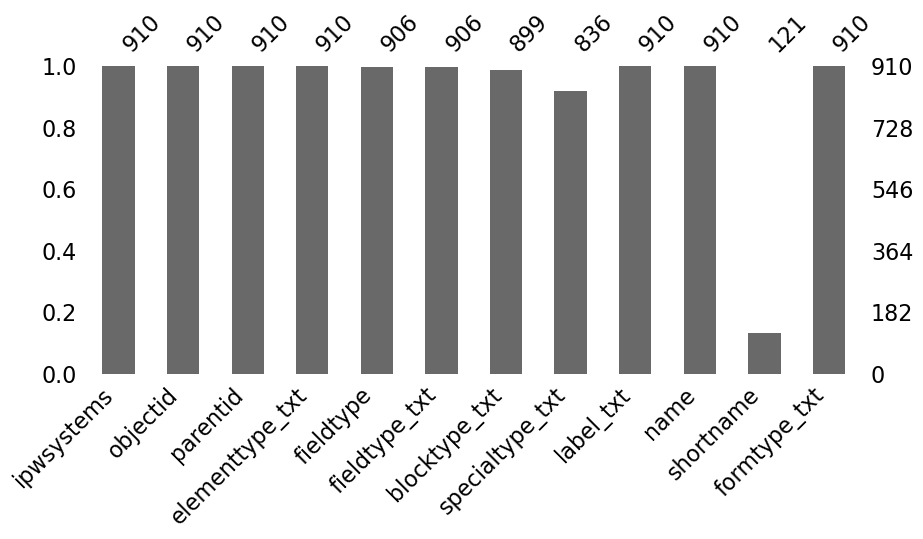

In [3]:
!pip install missingno
import missingno as msno
msno.bar(data,figsize=(10,4)) 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ipwsystems       910 non-null    object
 1   objectid         910 non-null    int64 
 2   parentid         910 non-null    int64 
 3   elementtype_txt  910 non-null    object
 4   fieldtype        906 non-null    object
 5   fieldtype_txt    906 non-null    object
 6   blocktype_txt    899 non-null    object
 7   specialtype_txt  836 non-null    object
 8   label_txt        910 non-null    object
 9   name             910 non-null    object
 10  shortname        121 non-null    object
 11  formtype_txt     910 non-null    object
dtypes: int64(2), object(10)
memory usage: 85.4+ KB


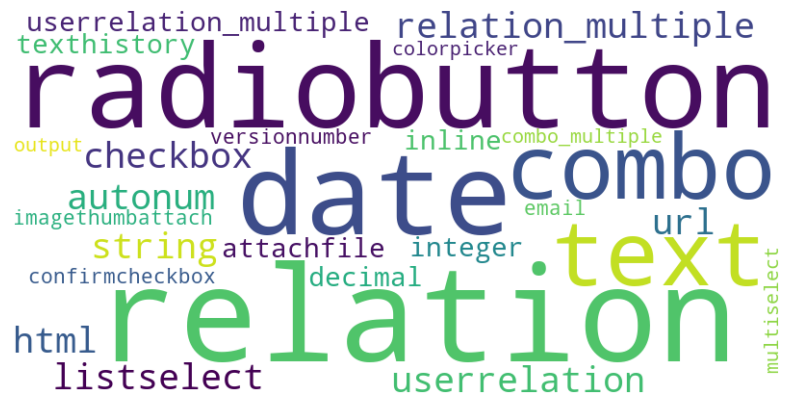

In [5]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string

text = ' '.join(data['fieldtype'].dropna().astype(str).unique())
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

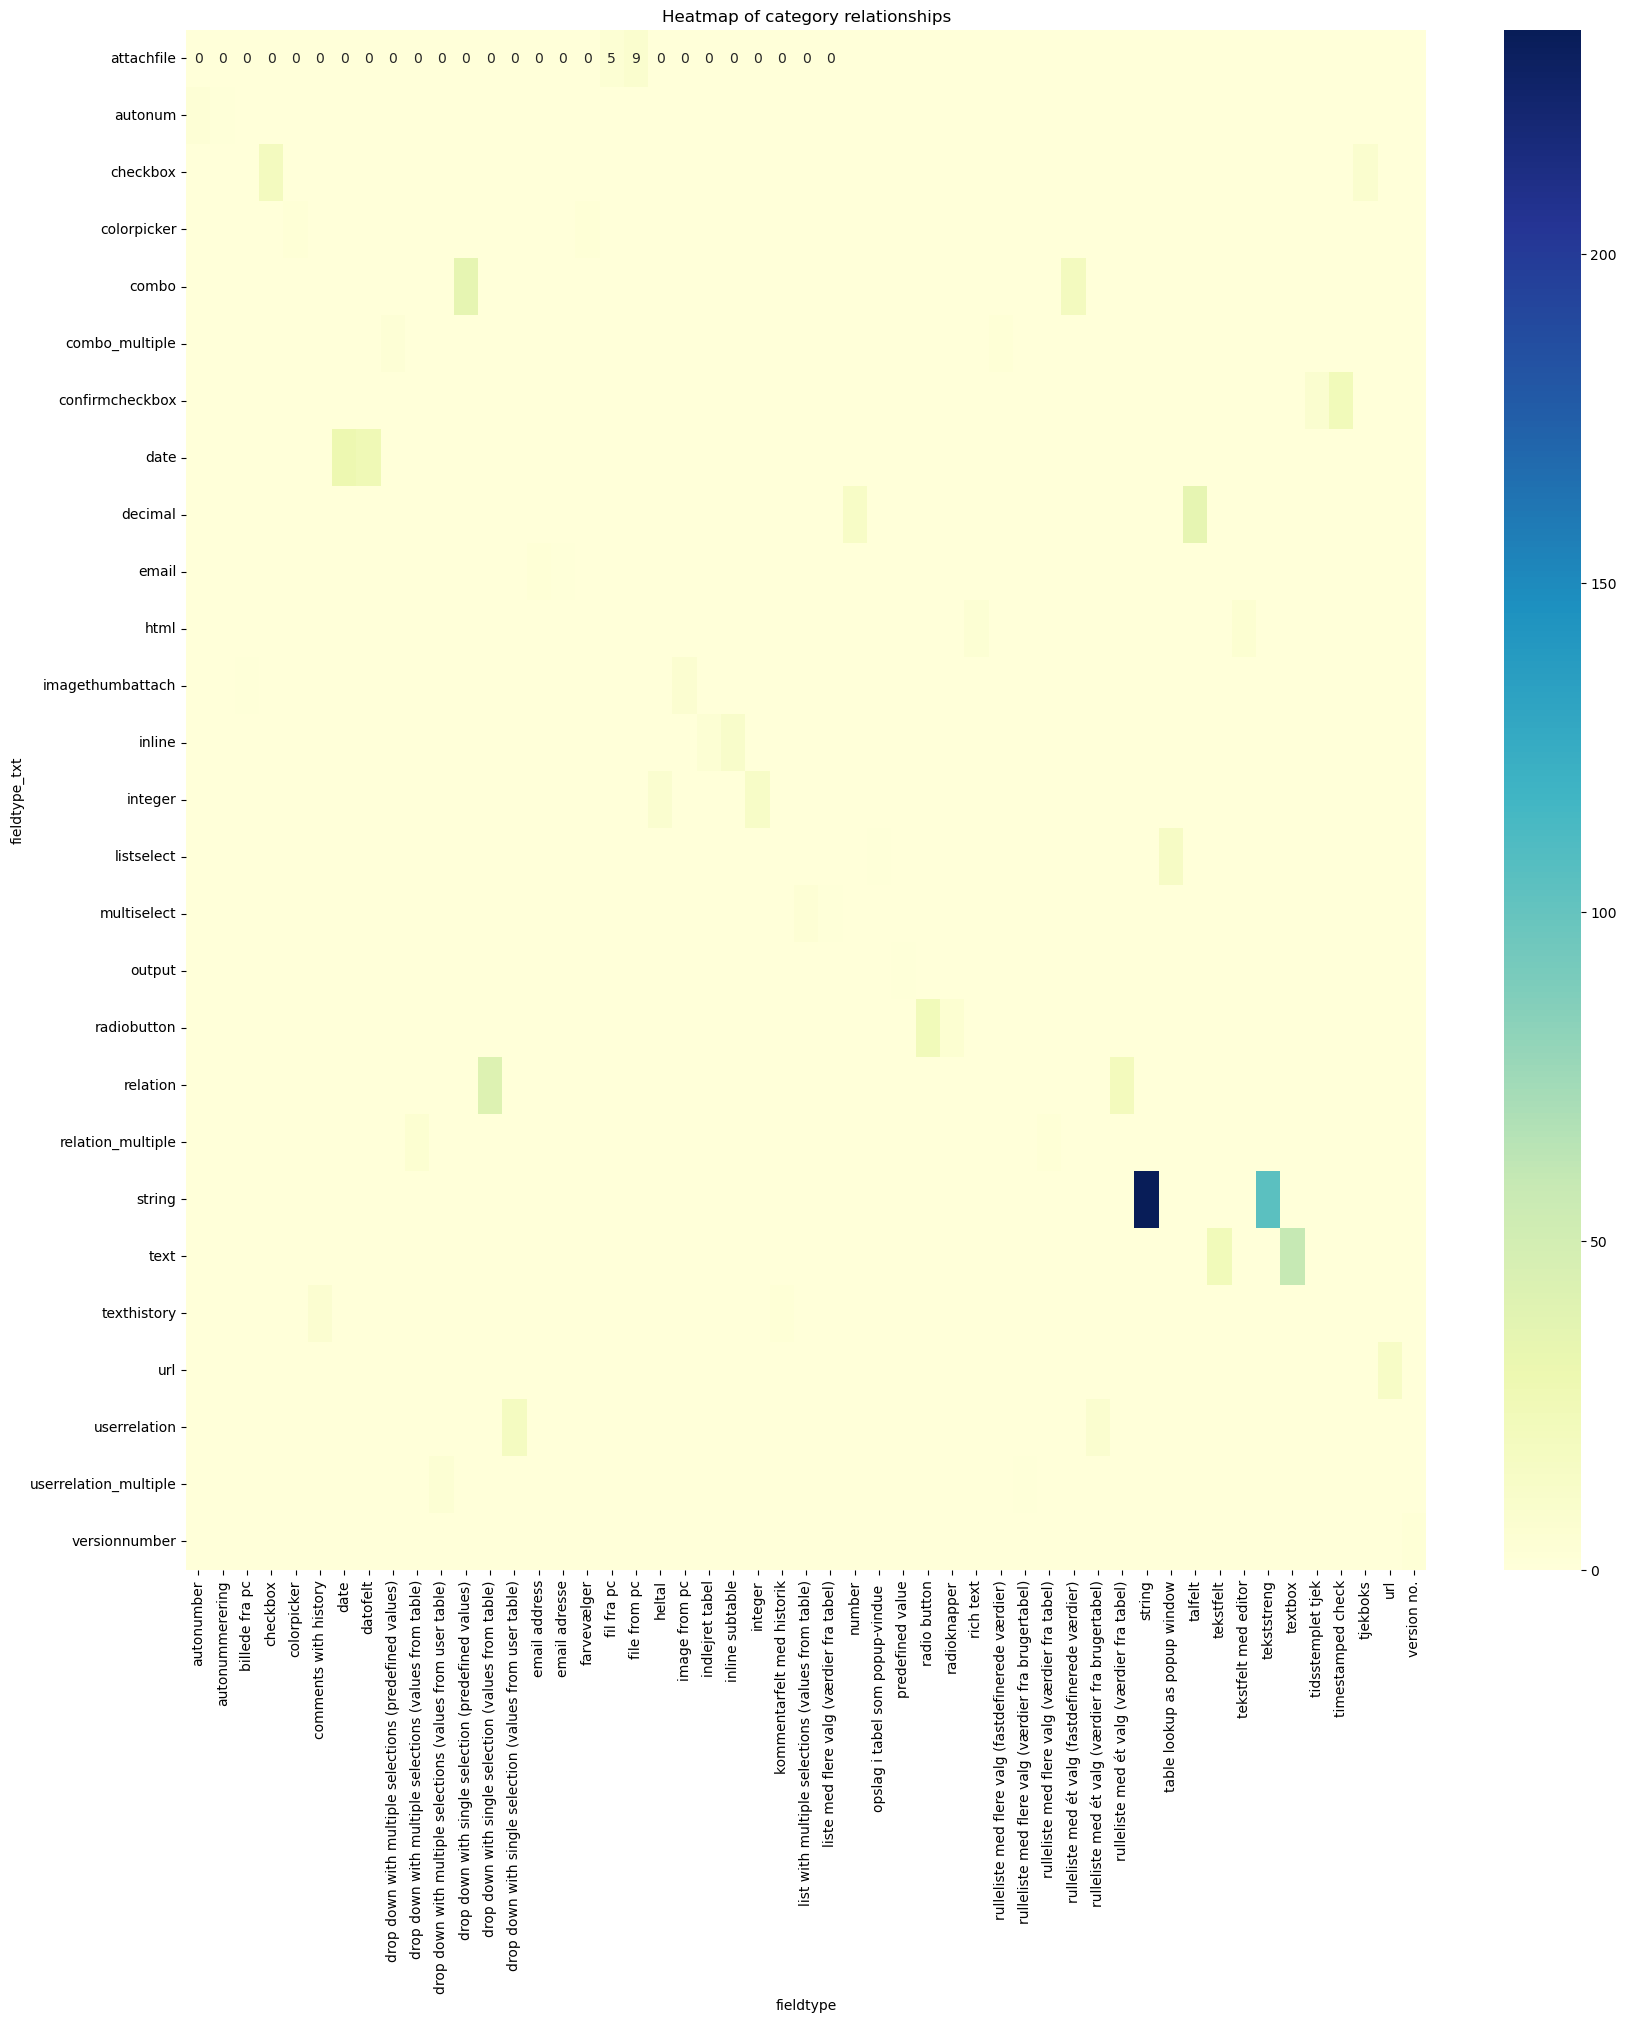

In [6]:
import seaborn as sns
cross = pd.crosstab(data["fieldtype"],data["fieldtype_txt"].str.lower())

plt.figure(figsize=(20,20))
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("fieldtype")
plt.ylabel("fieldtype_txt")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Heatmap of category relationships")
plt.show()

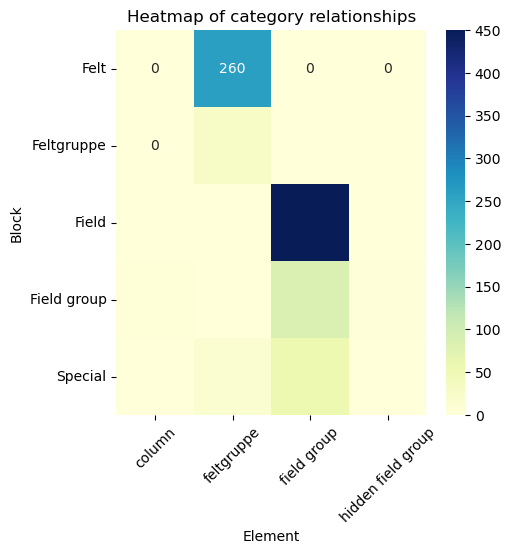

In [7]:
cross = pd.crosstab(data["elementtype_txt"],data["blocktype_txt"].str.lower())

plt.figure(figsize=(5,5))
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Element")
plt.ylabel("Block")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Heatmap of category relationships")
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_cleaned = data.drop(columns="shortname")
data_cleaned = data.dropna()

X_text = vectorizer.fit_transform(data_cleaned)
print("Vectorized Text Data:")
print(X_text.toarray())

Vectorized Text Data:
[[0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]]


Outliers:
    blocktype_txt  elementtype_txt  fieldtype  fieldtype_txt  formtype_txt  \
0             NaN              NaN        NaN            NaN           NaN   
1             NaN              NaN        NaN            NaN           NaN   
2             NaN              NaN        NaN            NaN           NaN   
3             NaN              1.0        NaN            NaN           NaN   
4             NaN              NaN        1.0            NaN           NaN   
5             NaN              NaN        NaN            1.0           NaN   
6             1.0              NaN        NaN            NaN           NaN   
7             NaN              NaN        NaN            NaN           NaN   
8             NaN              NaN        NaN            NaN           NaN   
9             NaN              NaN        NaN            NaN           NaN   
10            NaN              NaN        NaN            NaN           NaN   
11            NaN              NaN        NaN         

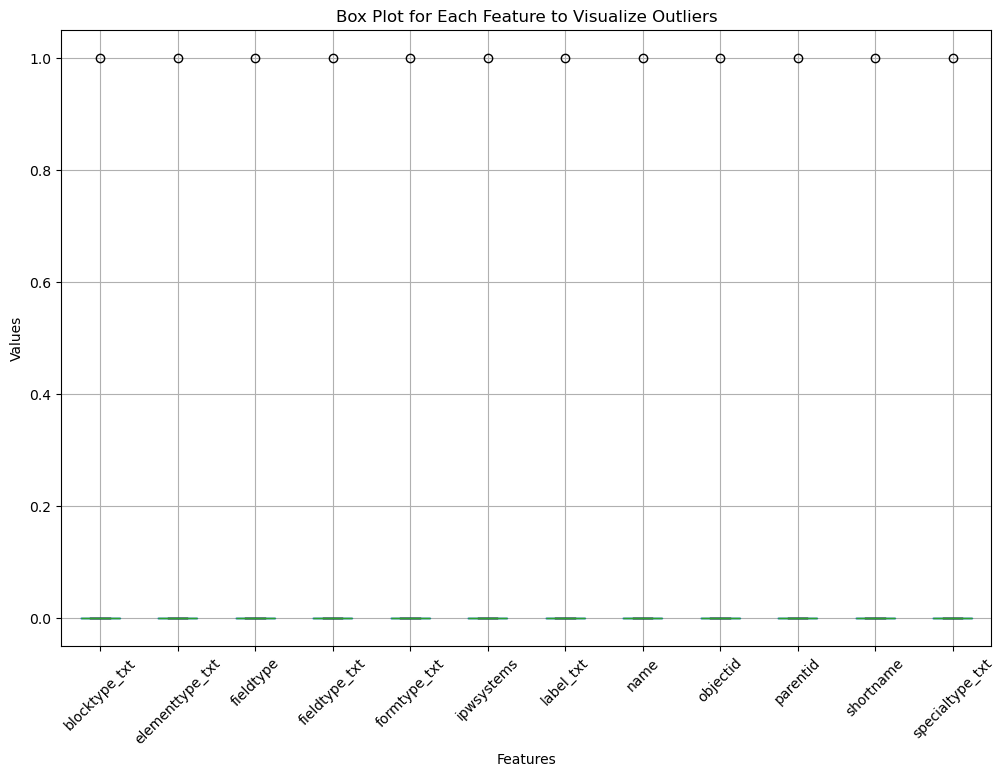

In [9]:
from scipy.stats import zscore

X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())
z_scores = X_text_df.apply(zscore)
outliers = X_text_df[(z_scores > 3) | (z_scores < -3)]
print("Outliers:")
print(outliers)

plt.figure(figsize=(12, 8))
X_text_df.boxplot()
plt.title('Box Plot for Each Feature to Visualize Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

- What we have learned is that: 
    - Fieldtype and Fieldtype_txt is highly corrected.
    - Date, Relation, Text, Radiobutton and Combo are the most common used words.
    - There are outliers.
    - Fieldtype and Blocktype are categorical values.
    - The following columns are irrelevant for our model: Shortname, Specialtype_txt, IpwSystems, Fieldtype_txt, Elementtype_txt, ParentID and ObjectID

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

In [10]:
def clean_vip_data(df):
    df = df.drop(columns={"shortname","specialtype_txt","ipwsystems","fieldtype_txt","elementtype_txt", "objectid", "parentid", "label_txt"});
    df = df.dropna()
    return df

In [11]:
def categorize_data(df):
    cleaned_df = pd.get_dummies(df, columns=["fieldtype","blocktype_txt","formtype_txt","name"]);
    print("Data shape after get_dummies:", cleaned_df.shape)
    return cleaned_df;

In [12]:
cleaned_df = clean_vip_data(data)
cleaned_df2 = categorize_data(cleaned_df)
pprint(cleaned_df2)

Data shape after get_dummies: (899, 225)
     fieldtype_attachfile  fieldtype_autonum  fieldtype_checkbox  \
0                   False              False               False   
1                   False              False               False   
2                   False              False               False   
3                   False              False               False   
4                   False              False               False   
..                    ...                ...                 ...   
905                 False              False               False   
906                 False              False               False   
907                 False              False               False   
908                 False              False               False   
909                 False              False               False   

     fieldtype_colorpicker  fieldtype_combo  fieldtype_combo_multiple  \
0                    False            False                     False

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

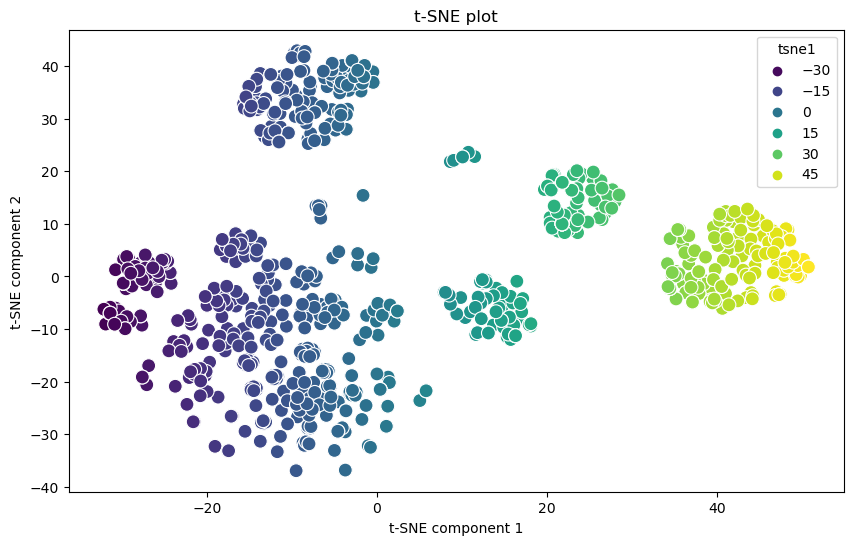

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_embedded = tsne.fit_transform(cleaned_df2)
tsne_df = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_df['tsne1'], y=tsne_df['tsne2'], hue=tsne_df['tsne1'], palette='viridis', s=100)
plt.title('t-SNE plot')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

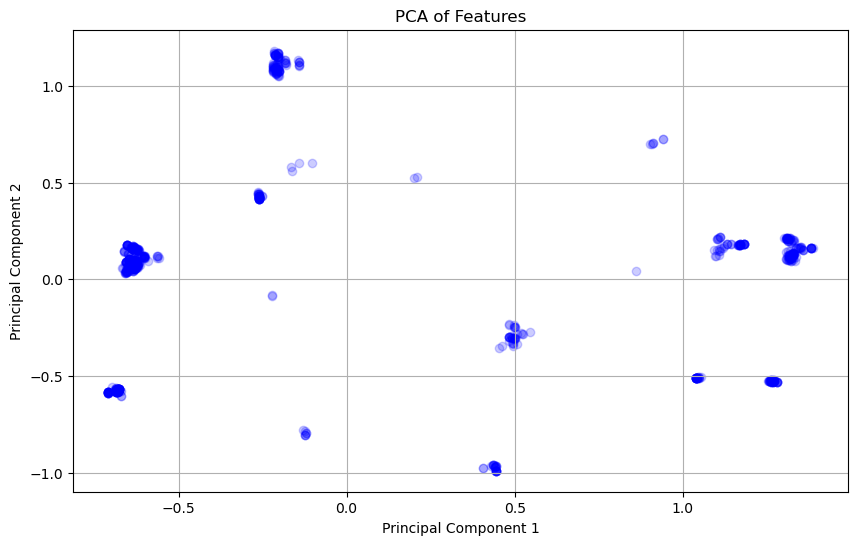

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(cleaned_df2)
pca_df = pd.DataFrame(components, columns=['pca1', 'pca2'])

plt.figure(figsize=(10,6))
plt.scatter(pca_df['pca1'], pca_df['pca2'], alpha=0.2, color="blue", label="PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.grid(True)
plt.show()

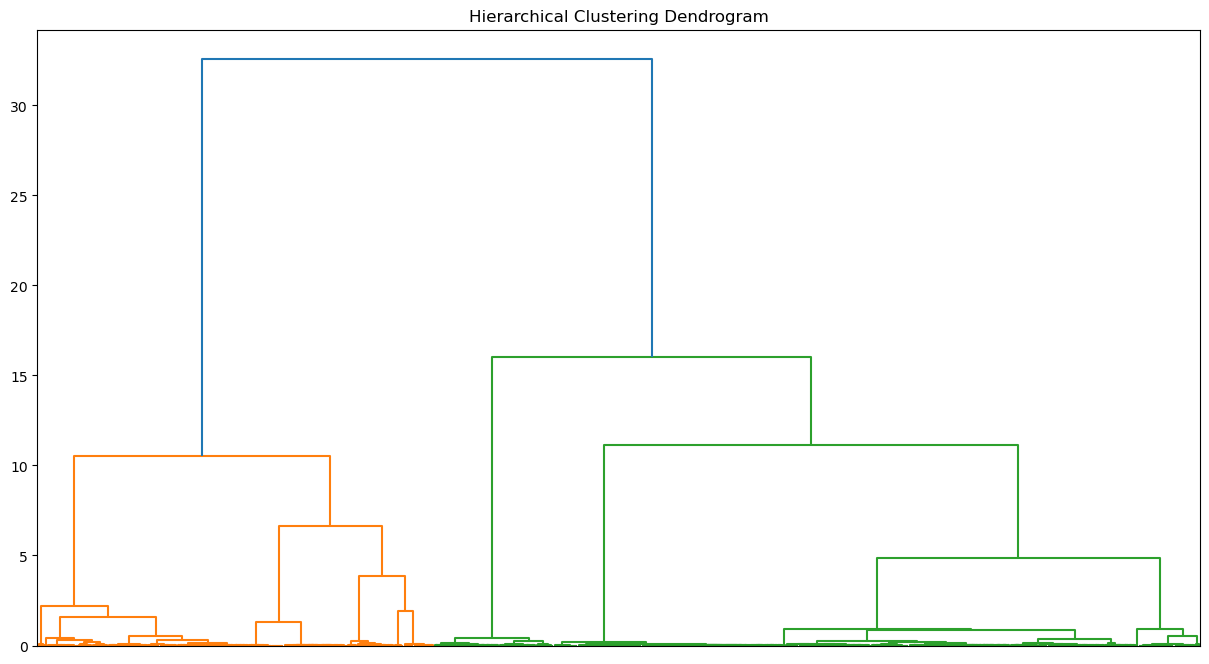

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(components, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.xticks([]) 
plt.show()

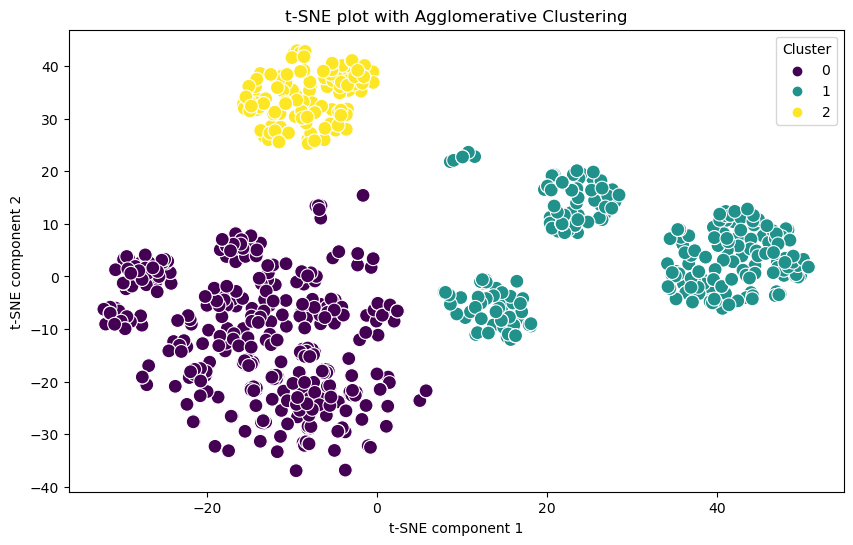

In [16]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)  # You can choose the number of clusters
cluster_labels = agglomerative.fit_predict(X_embedded)  # X_embedded from t-SNE transformation
tsne_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=tsne_df, palette='viridis', s=100)
plt.title('t-SNE plot with Agglomerative Clustering')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(title='Cluster')
plt.show()

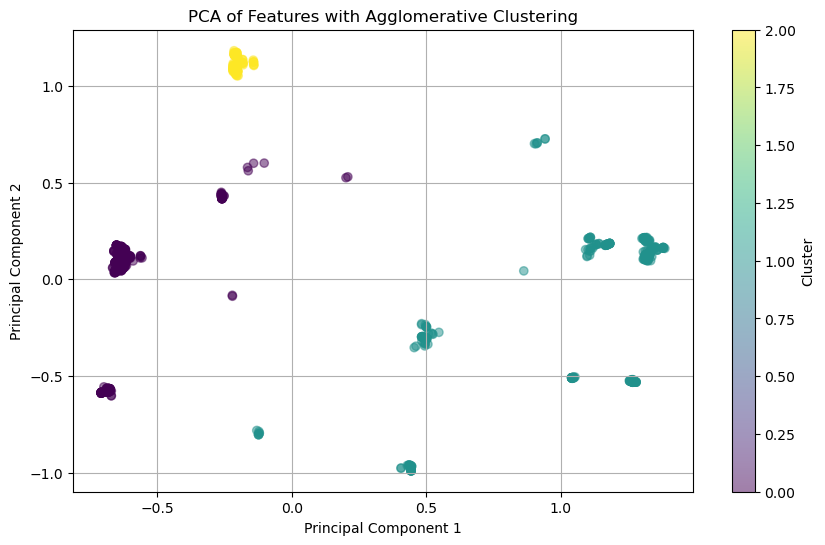

In [17]:
agglomerative = AgglomerativeClustering(n_clusters=3) 
cluster_labels = agglomerative.fit_predict(components)
pca_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['pca1'], pca_df['pca2'], alpha=0.5, c=pca_df['cluster'], cmap='viridis', label="PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features with Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

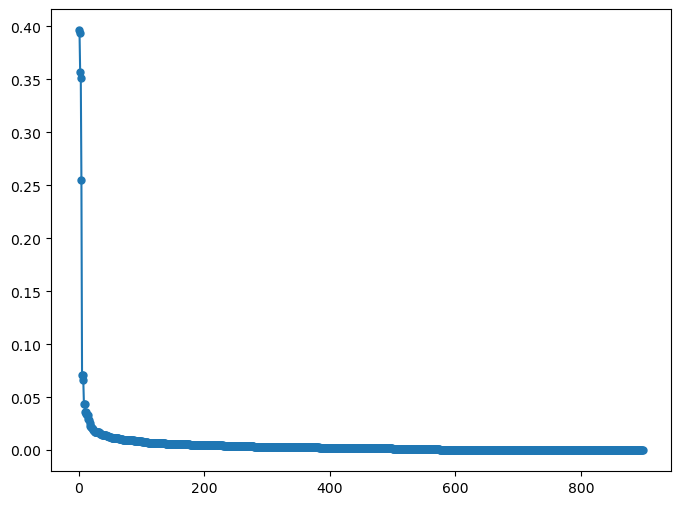

In [18]:
def calculate_k_distance(X,k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X[i,:]-X[j,:]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

k = 3
k_distances = calculate_k_distance(components,k)
plt.figure(figsize=(8,6))
plt.plot(range(len(components)),k_distances, markersize=5, marker='o', linestyle='-')
plt.show()

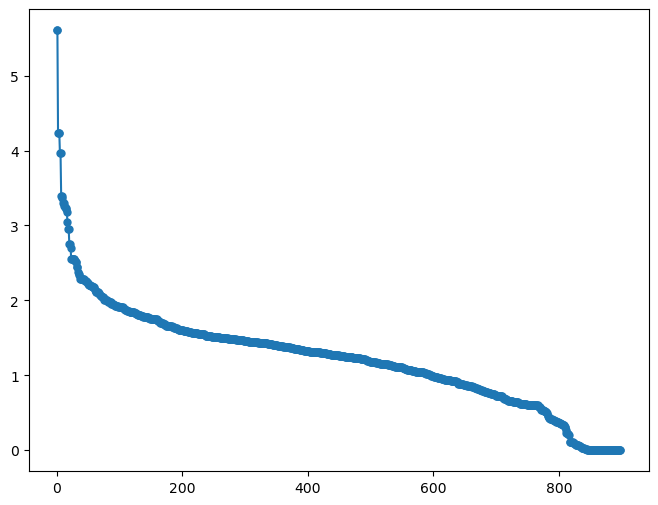

In [19]:
k_distances = calculate_k_distance(X_embedded,k)
plt.figure(figsize=(8,6))
plt.plot(range(len(X_embedded)),k_distances, markersize=5, marker='o', linestyle='-')
plt.show()

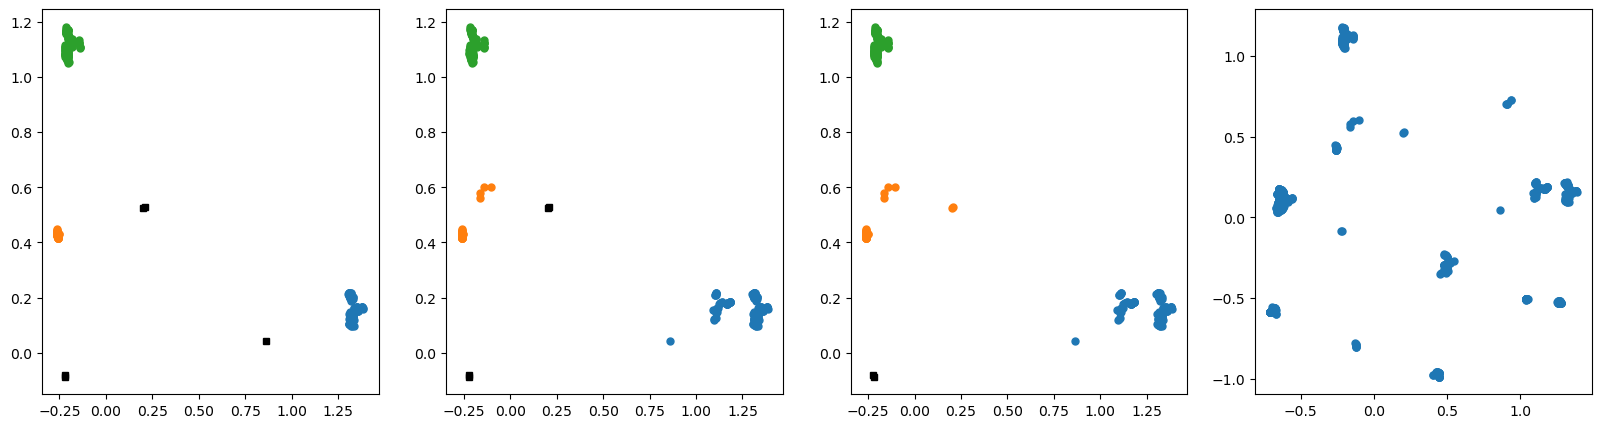

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def plot_dbscan(eps):
    fig, axes = plt.subplots(1,4, figsize = (20,5))
    for i, ax in enumerate(zip(axes.ravel())):
        dbscan = DBSCAN(eps=eps[i], min_samples = 4)
        label = dbscan.fit_predict(components)
        for i in range(k):
            ax[0].plot(components[label == i , 0] , components[label == i , 1], '.', markersize=10, label = i)
        ax[0].plot(components[label == -1 , 0] , components[label == -1 , 1], 'sk', markersize=4, label = -1) #plot outliers as black squares
    plt.show()

plot_dbscan([0.1, 0.3, 0.35, 1])

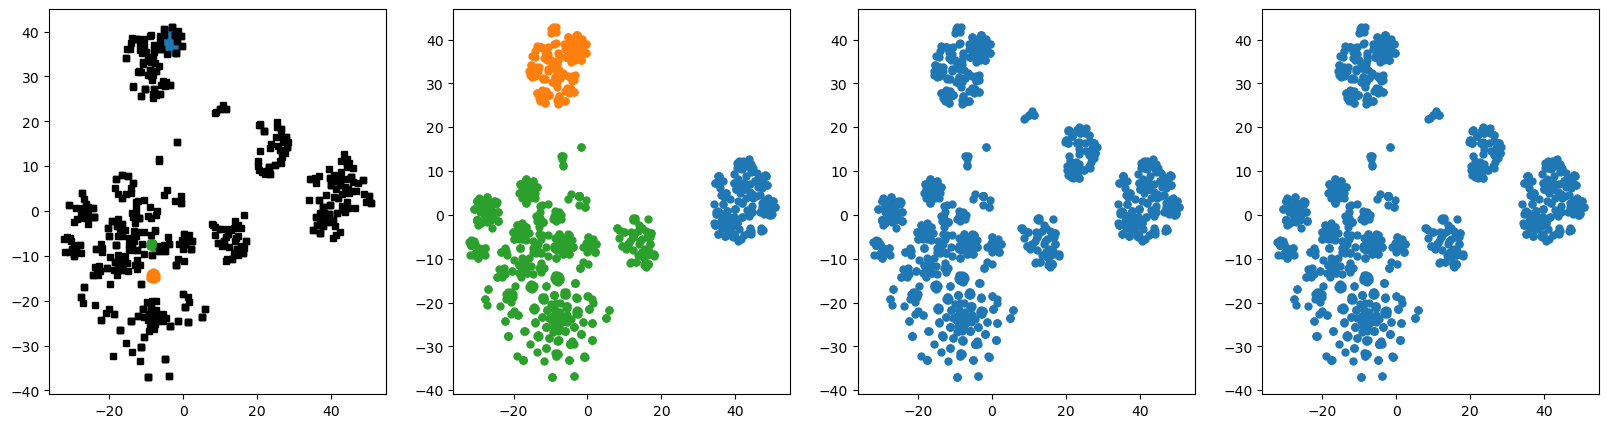

In [21]:
def plot_dbscan(eps):
    fig, axes = plt.subplots(1,4, figsize = (20,5))
    for i, ax in enumerate(zip(axes.ravel())):
        dbscan = DBSCAN(eps=eps[i], min_samples = 4)
        label = dbscan.fit_predict(X_embedded)
        for i in range(k):
            ax[0].plot(X_embedded[label == i , 0] , X_embedded[label == i , 1], '.', markersize=10, label = i)
        ax[0].plot(X_embedded[label == -1 , 0] , X_embedded[label == -1 , 1], 'sk', markersize=4, label = -1) #plot outliers as black squares
    plt.show()

plot_dbscan([1, 7, 15, 20])

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(cleaned_df2, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
silhouette_avg = silhouette_score(X_test, y_pred)
print("Silhouette Score:", silhouette_avg)

c:\Users\migle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\migle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score: 0.20324921732891618


Findings:
 - We find 3 clusters on tsne.

 - We found the most common text is blocktype_txt_Field group.
 - Half of the data seems to be blocktype_txt_Field group.
 - We can find 2 clusters in PCA blocktype_txt_Field group.

 - We found through the elbow that the best number of k is 3.
 - The best epsilon is between 0.35 with pca and 7 with t-sne.
 - There is, for sure, at least 1 outliar.


### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

In [38]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(components, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
silhouette_avg = silhouette_score(X_test, y_pred)
print("Silhouette Score:", silhouette_avg)

c:\Users\migle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\migle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score: 0.9175218669097925


### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

Link to the video: https://www.youtube.com/watch?v=K_B11onQrjw